## Selecting our model

I will select suitable metrics that are appropriate for multi-class classification problems and have been used for similar tasks.
the metrics will  : 
 * accuracy score, 
 * confusion matrices (precision, recall, f1_score). 
 
I will fine tune the selection of performance measures depending on whether the distribution of outcome labels is balanced or imbalanced. 



Select modeling tools


The appropriateness of different models based on the task at hand, multi-class classification, taking into account other parameters such as size, shape and other characteristics of the data, training speed.
The classifier models I will try are : 
 * Support Vector Machine 


 SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.


 * Multinomial  Logistic Regression 

 
 Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.


 Logistic regression, by default, is limited to two-class classification problems. Some extensions like one-vs-rest can allow logistic regression to be used for multi-class classification problems, although they require that the classification problem first be transformed into multiple binary classification problems.


 * Random Forest Classifier 


 A random forest is a machine learning technique that's used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees.

 * Decision Tree 


 Decision tree learning or induction of decision trees is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

 * Knn Neighbors 


 Nearest neighbor classification is a machine learning method that aims at labeling previously unseen query objects while distinguishing two or more destination classes. As any classifier, in general, it requires some training data with given labels and, thus, is an instance of supervised learning.

 * Naives Bayes 


 Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each oth




Implement model

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,  metrics, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score, confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold,train_test_split 
from sklearn.svm import LinearSVC ,SVC
from sklearn.model_selection import cross_val_predict
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix,DiscriminationThreshold

In [72]:
df1 = pd.read_csv('df_to_scaled1.csv',index_col='Unnamed: 0')

In [74]:
df1= pd.get_dummies(df1,columns = ['DEPARTMENT','i2i_Source_of_income','Residence stratum'],prefix=['Departement','income','res'] )


# Building our model

## Data Preprocessing

In [75]:
# Here we are normalizing all columns in our dataset except the target.
cols_to_scale = df1.columns.difference(['Financial Access Strand'])
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df1[cols_to_scale])
df_scaled = pd.DataFrame(df_scaled,columns = df1.columns.difference(['Financial Access Strand']))


## Features Selection

In [44]:
from scipy import stats
from scipy.stats import chi2_contingency
import math


def Cramer(x,y):
    '''
    Calculate Cramers V statistic for categorial-categorial association
    '''
    c_matrix = pd.crosstab(x,y)
    r,k = c_matrix.shape
    n = c_matrix.values.sum()
    chi2,p,dof,e = chi2_contingency(c_matrix)
    phi2 = chi2/n
    phi_hat2 = max(0,phi2 - (k-1)*(r-1)/(n-1))
    k_hat = k - math.pow((k-1),2)/(n-1)
    r_hat = r - math.pow((r-1),2)/(n-1)
    min_r_hat_k_hat = min(r_hat,k_hat)
    v_hat = math.sqrt(phi_hat2/(min_r_hat_k_hat-1))
    return v_hat


cat_features = [col for col in df_scaled.columns if df_scaled[col].nunique() < 50]


collinear = ['L2a. Have you used the Mobile money services of (name of service provider )?:Mon Cash','L2a. Have you used the Mobile money services of (name of service provider )?:Lajan Cash', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction',  'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account', 'j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM','A1.2. How old are you?','A1.2. How old are you?']
reduced_features = [var for var in cat_features if var not in collinear]
df_cat = df_scaled[reduced_features]

v_matrix = pd.DataFrame(index = reduced_features)

for i in df_cat.columns:
    stats = []
    for j in df_cat.columns:
        v_hat = Cramer(df_cat[i],df_cat[j])
        stats.append(v_hat)
    v_matrix[i] = stats

<AxesSubplot:>

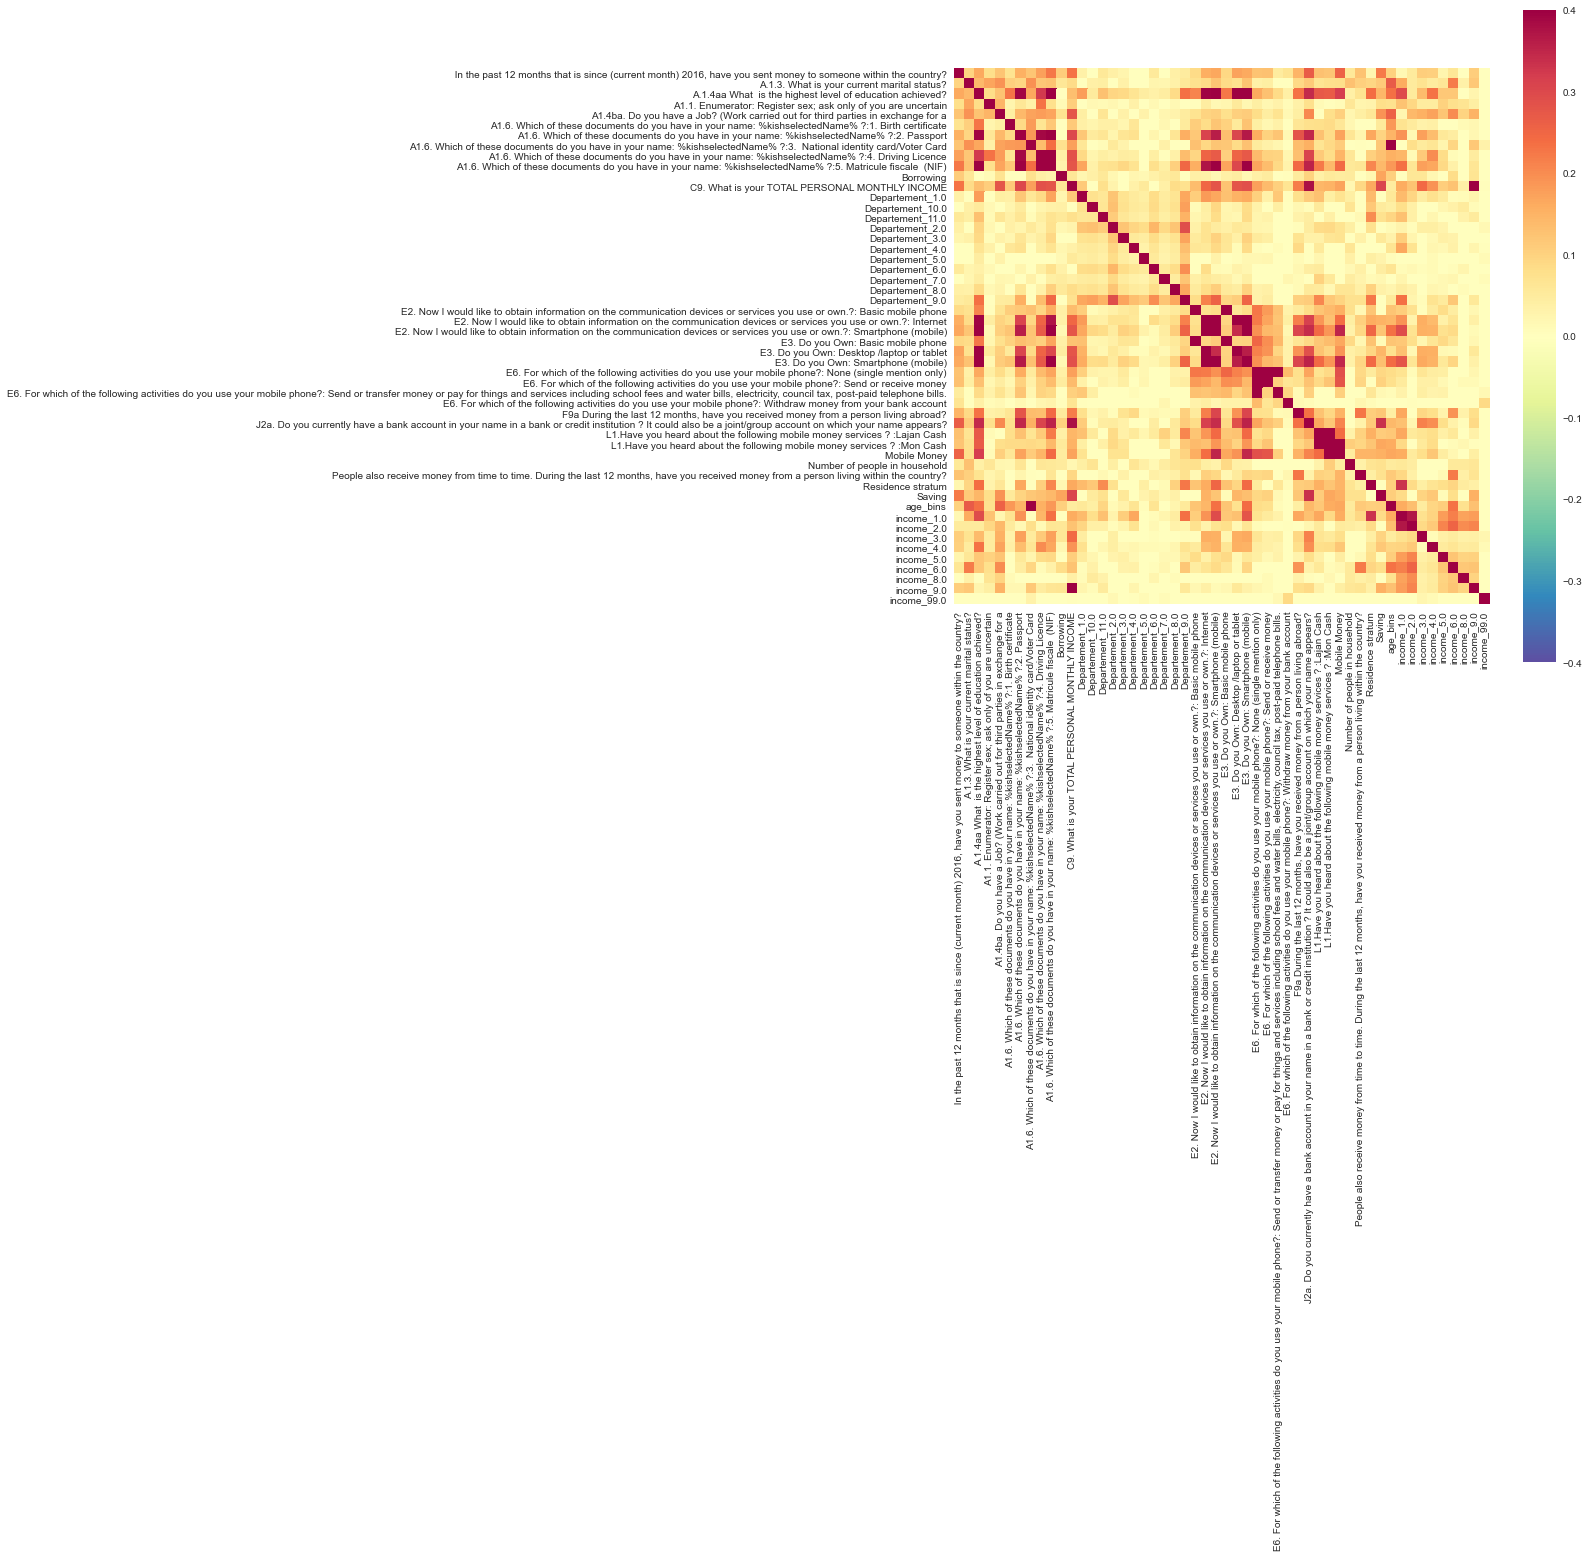

In [45]:
fig = plt.gcf()
fig.set_size_inches(12, 12)
sns.heatmap(v_matrix, cmap='Spectral_r',square=True, vmin=-.4, vmax=.4)

Here, to avoid multicolinearity, we will drop the columns that help us build our target variable.

In [7]:
#df_scaled = df_scaled.drop(['Mobile Money'], axis = 1)

In [76]:

X = df_scaled
y = df1['Financial Access Strand']

In [47]:
X

,"In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?",A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.1. Enumerator: Register sex; ask only of you are uncertain,A1.2. How old are you?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3. National identity card/Voter Card,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:4. Driving Licence,...,income_4.0,income_5.0,income_6.0,income_8.0,income_9.0,income_99.0,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction
0,0.0,0.8,0.000000,1.0,0.329412,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.4,1.000000,0.0,0.152941,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.500000,0.0,0.011765,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.833333,1.0,0.141176,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.666667,0.0,0.129412,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,0.0,0.2,0.500000,0.0,0.223529,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4265,1.0,0.0,0.500000,1.0,0.082353,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4266,1.0,0.0,0.666667,1.0,0.058824,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4267,0.0,0.0,0.500000,1.0,0.047059,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(f_classif, k=40)
selector.fit(X, y)

df_scores = pd.DataFrame(selector.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
display(feature_scores.nlargest(20,'Score'))  # print 20 best features
features =df_scaled.columns[selector.get_support()]
X = df_scaled[features]


,Feature_Name,Score
35,J2a. Do you currently have a bank account in y...,1239.379770
43,Saving,1056.054439
54,j5a. We are now talking about transactions Whi...,892.488272
40,Mobile Money,848.848530
39,L2a. Have you used the Mobile money services o...,834.962765
34,"F9a During the last 12 months, have you receiv...",664.670967
29,E3. Do you Own: Smartphone (mobile),402.258827
26,E2. Now I would like to obtain information on ...,395.911204
10,A1.6. Which of these documents do you have in ...,318.850167
55,j5a. We are now talking about transactions Whi...,286.445270


## Splitting the Dataset 

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.30,random_state=456,stratify = y)

### Finding best k for knn classifier


In [12]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [13]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 78.22014051522248 and k = [12, 15]


## Fitting Our Model 

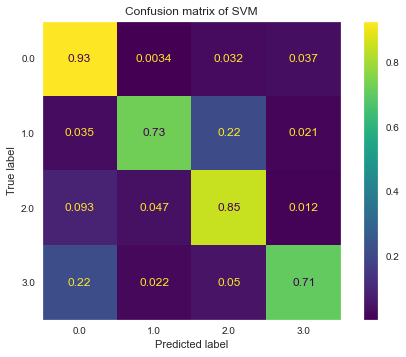

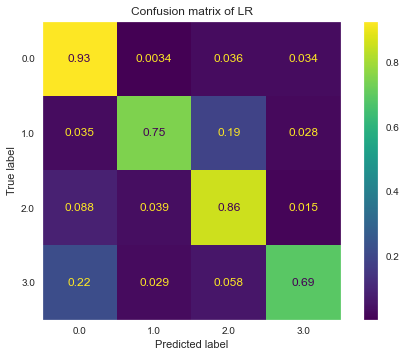

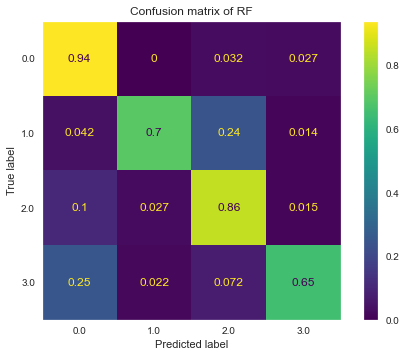

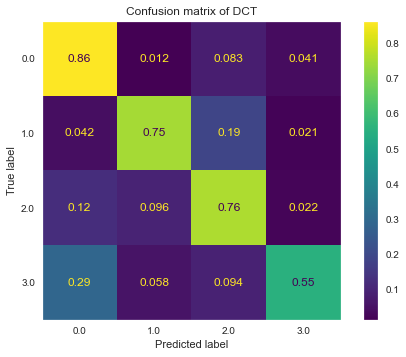

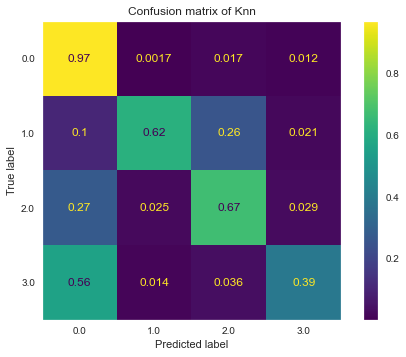

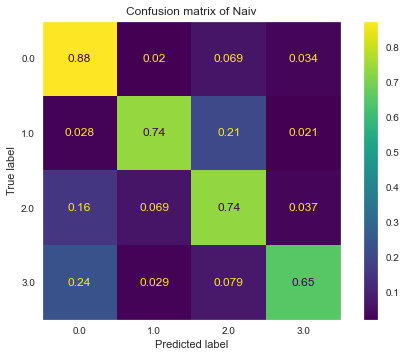

In [62]:
svm_clf = svm.LinearSVC( max_iter= 2900, random_state = 0)
lr_clf = LogisticRegression(max_iter= 2900, random_state = 0)
rf_clf = RandomForestClassifier(random_state = 0)
knn = KNeighborsClassifier(n_neighbors=13)
bayes = MultinomialNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=0)
import time 
kfold = KFold(n_splits=5 ,random_state=0,shuffle = True) 
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'Naiv': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train) # Fit the training data to the Model
    end = time.time()
    cv_result = cross_val_score(v, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))
    sns.set_style("dark") 

In [63]:
models_df

,SVM,LR,RF,DCT,Knn,Naiv
mean,84.270516,84.672639,84.705187,77.779197,75.166468,78.146250
std,0.810348,1.149009,0.900450,1.823777,1.302272,1.065759
time,0.825208,0.965122,0.999899,0.047271,0.005006,0.007000


What is the AUC - ROC Curve?


AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

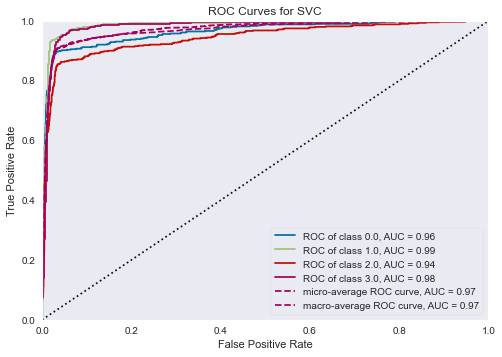

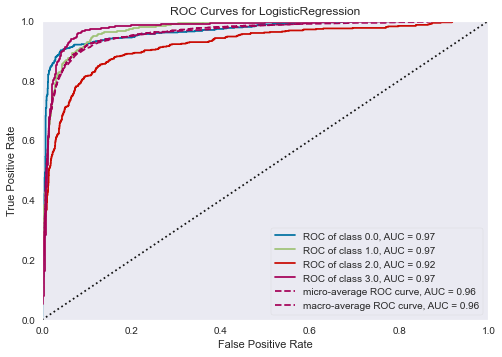

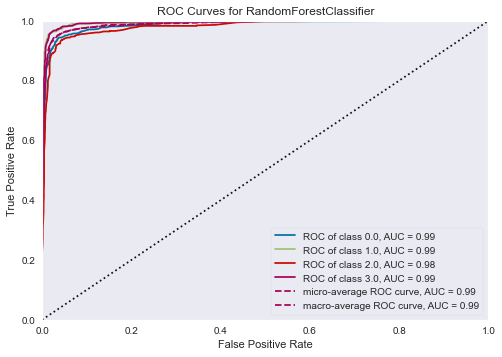

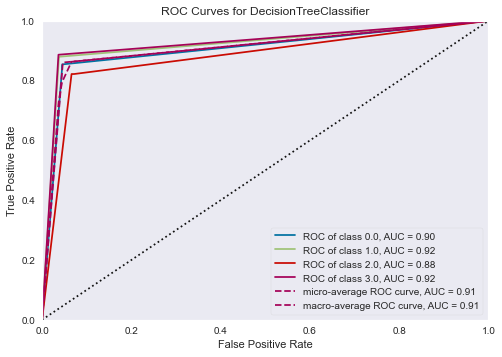

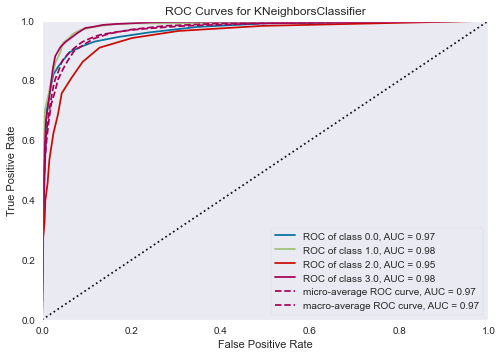

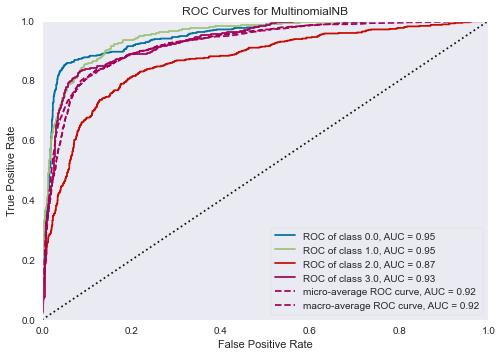

In [58]:
for k,v in models.items ( ) : 
    visualizer = ROCAUC(v)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
    g = visualizer.show()

In [57]:
for k,v in models.items():
    print(k)
    y_predict = v.predict(X_test)
    print(metrics.classification_report(y_test, y_predict, digits=3)) 

SVM
              precision    recall  f1-score   support

         0.0      0.903     0.898     0.901       590
         1.0      0.937     0.934     0.936       591
         2.0      0.890     0.854     0.872       590
         3.0      0.894     0.937     0.915       591

    accuracy                          0.906      2362
   macro avg      0.906     0.906     0.906      2362
weighted avg      0.906     0.906     0.906      2362

LR
              precision    recall  f1-score   support

         0.0      0.877     0.898     0.888       590
         1.0      0.851     0.849     0.850       591
         2.0      0.796     0.742     0.768       590
         3.0      0.862     0.902     0.882       591

    accuracy                          0.848      2362
   macro avg      0.847     0.848     0.847      2362
weighted avg      0.847     0.848     0.847      2362

RF
              precision    recall  f1-score   support

         0.0      0.916     0.927     0.922       590
         1.

Over Sampling our Trainig Data to improve our Recall



In [52]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)



In [53]:
y.value_counts()

0.0    1968
2.0    1968
1.0    1968
3.0    1968
Name: Financial Access Strand, dtype: int64

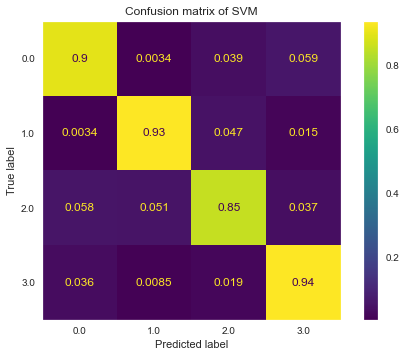

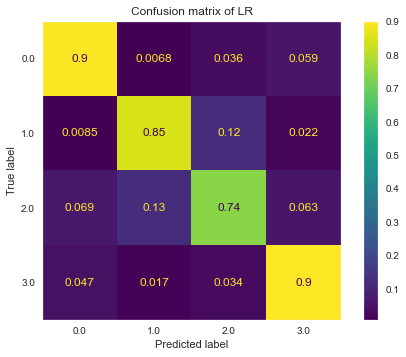

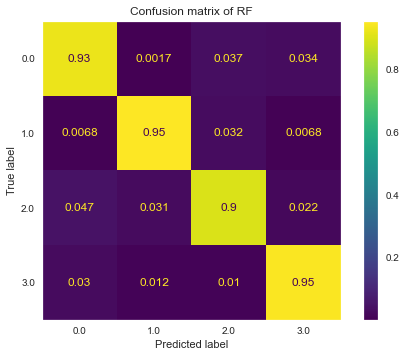

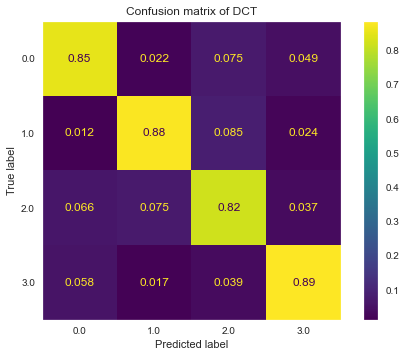

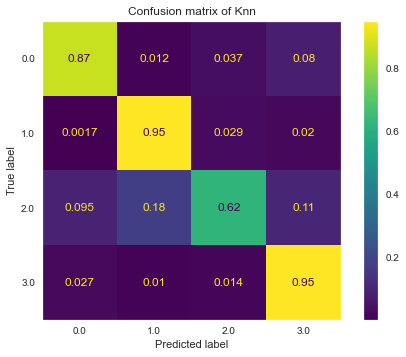

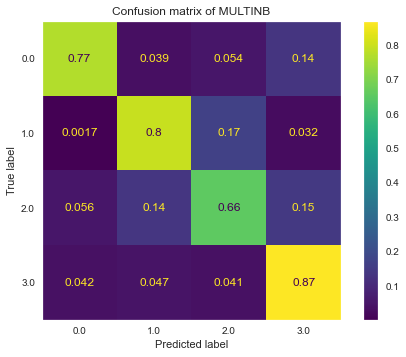

In [54]:
svm_clf = SVC()
lr_clf = LogisticRegression(max_iter = 900)
rf_clf = RandomForestClassifier(random_state = 5)
knn = KNeighborsClassifier(n_neighbors=18)
bayes = MultinomialNB()
df_acc = pd.DataFrame()
dec_tree = tree.DecisionTreeClassifier(random_state=5)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.30,random_state=456,stratify = y)
kfold = KFold(n_splits=5 ,random_state=0,shuffle = True)
moments = ['mean', 'std','time']
models_df = pd.DataFrame(index = moments)
models = {'SVM': svm_clf, 'LR':lr_clf, 'RF': rf_clf,'DCT' :dec_tree, 'Knn' : knn, 'MULTINB': bayes} 

for k,v in models.items():
    start = time.time()
    stats = []
    v.fit(X_train,y_train)
    end = time.time()
    cv_result = cross_val_score(v, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result = cv_result*100
    df_acc[k] = cv_result
    stats.append(cv_result.mean())
    stats.append((cv_result).std())
    stats.append(end-start)
    models_df[k] = stats
    plot_confusion_matrix(v,X_test,y_test,normalize = 'true')
    plt.title('Confusion matrix of {}'.format(k))

In [55]:
models_df

,SVM,LR,RF,DCT,Knn,MULTINB
mean,88.566243,83.357532,91.179673,83.956443,82.522686,75.735027
std,0.714520,0.694889,0.239399,1.270936,0.742994,0.558205
time,4.122974,1.526565,1.780445,0.097059,0.006006,0.009002


In [39]:

from sklearn.metrics import precision_recall_fscore_support as score
for k,v in models.items():
    print(k,'\n')


    y_predict = v.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_predict,average = 'weighted')
    print(metrics.classification_report(y_test, y_predict, digits=3)) 
    print('precision: {}'.format(precision*100))
    print('recall: {}'.format(recall*100))
    print('fscore: {}'.format(fscore*100))

SVM 

              precision    recall  f1-score   support

         0.0      0.727     0.712     0.719       590
         1.0      0.891     0.910     0.900       591
         2.0      0.859     0.786     0.821       590
         3.0      0.738     0.799     0.767       591

    accuracy                          0.802      2362
   macro avg      0.804     0.802     0.802      2362
weighted avg      0.804     0.802     0.802      2362

precision: 80.35417933732762
recall: 80.18628281117697
fscore: 80.19497650401954
LR 

              precision    recall  f1-score   support

         0.0      0.631     0.641     0.636       590
         1.0      0.862     0.805     0.833       591
         2.0      0.764     0.768     0.766       590
         3.0      0.647     0.677     0.662       591

    accuracy                          0.723      2362
   macro avg      0.726     0.723     0.724      2362
weighted avg      0.726     0.723     0.724      2362

precision: 72.61572836240961
recall: 7

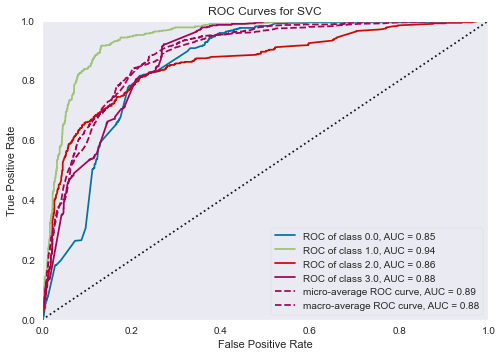

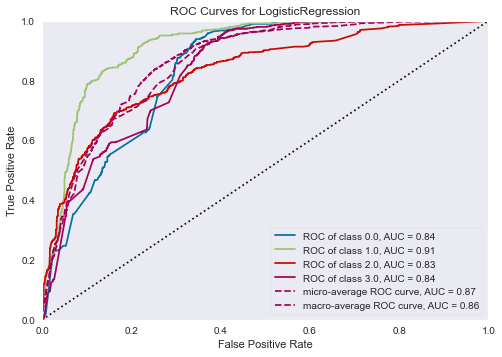

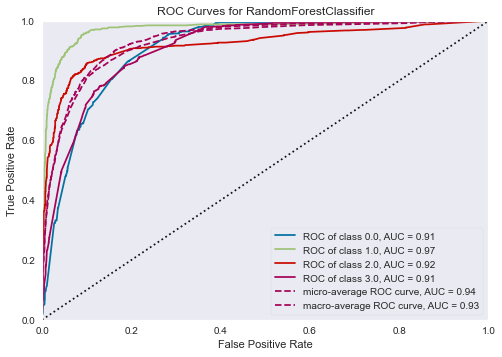

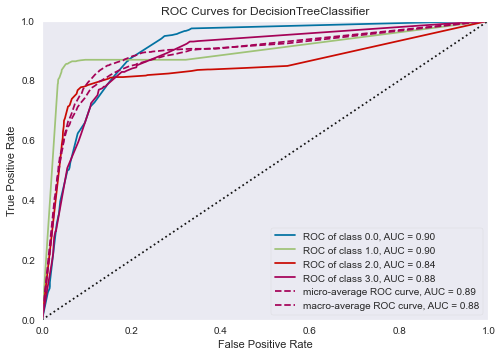

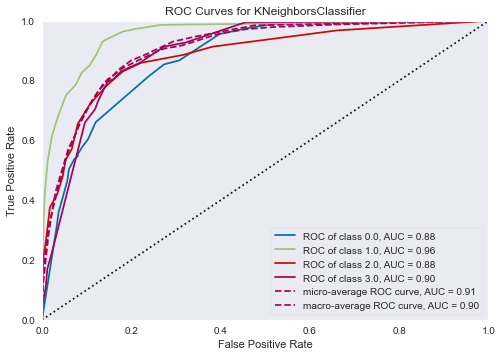

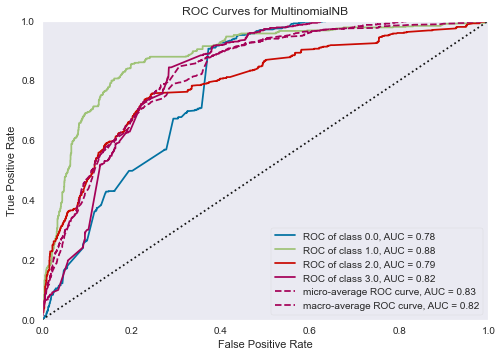

In [23]:
for k,v in models.items ( ) : 
    visualizer = ROCAUC(v)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
    g = visualizer.show()

# Clustering

In [79]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Cout du modele (Inertia)')

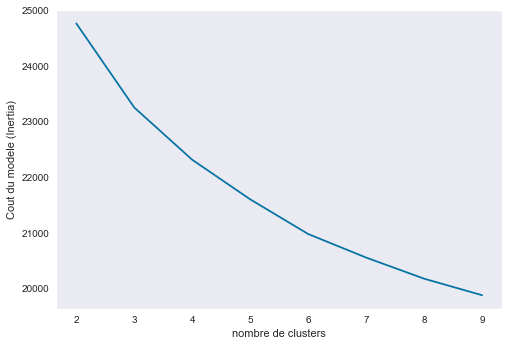

In [80]:
distances = []
nbr_clusters = []
for k in range(2,10):
  kmean = KMeans(n_clusters=k)
  kmean.fit(df_scaled)
  nbr_clusters.append(k)
  distances.append(kmean.inertia_)

plt.plot(nbr_clusters, distances)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')


In [81]:
kmeans =KMeans(n_clusters=6)
kmeans.fit(df_scaled)
kmeans.predict(df_scaled)

array([1, 4, 4, ..., 5, 0, 0])

In [82]:
labels =kmeans.labels_

In [83]:
df_scaled['labels'] = labels

In [84]:
cluster_1=df_scaled.loc[df_scaled['labels'] == 0].drop(columns=['labels'])
cluster_2=df_scaled.loc[df_scaled['labels'] == 1].drop(columns=['labels'])
cluster_3=df_scaled.loc[df_scaled['labels'] == 2].drop(columns=['labels'])
cluster_4=df_scaled.loc[df_scaled['labels'] == 3].drop(columns=['labels'])
cluster_5=df_scaled.loc[df_scaled['labels'] == 4].drop(columns=['labels'])
cluster_6=df_scaled.loc[df_scaled['labels'] == 5].drop(columns=['labels'])

In [70]:
cluster_3

,"In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?",A.1.3. What is your current marital status?,A.1.4aa What is the highest level of education achieved?,A1.1. Enumerator: Register sex; ask only of you are uncertain,A1.2. How old are you?,A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3. National identity card/Voter Card,A1.6. Which of these documents do you have in your name: %kishselectedName% ?:4. Driving Licence,...,income_4.0,income_5.0,income_6.0,income_8.0,income_9.0,income_99.0,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Deposit cash into a bank account,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months: Used cash point/ATM,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Internet/online banking transaction,j5a. We are now talking about transactions Which of the following transactions have you done in the past 12 months:Mobile banking transaction
0,0.0,0.8,0.000000,1.0,0.329412,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.666667,0.0,0.129412,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.500000,0.0,0.741176,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.666667,1.0,0.023529,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.833333,1.0,0.223529,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,0.0,0.2,0.000000,0.0,0.235294,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4260,0.0,1.0,0.000000,0.0,0.623529,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4262,0.0,0.0,0.000000,1.0,0.270588,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4263,0.0,0.2,0.166667,0.0,0.235294,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
cluster_1[cluster_3.columns[1]]

0       0.8
4       0.0
5       0.0
14      0.0
16      0.0
       ... 
4262    0.0
4263    0.2
4264    0.2
4266    0.0
4267    0.0
Name: A.1.3. What is your current marital status?, Length: 1542, dtype: float64

In [32]:
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1[cluster_3.columns[1]],cluster_1[cluster_3.columns[9]] , cluster_1[cluster_3.columns[5]], c='blue', s=60)
fig = plt.figure(figsize=(20,10))
ax.view_init(30, 185)
plt.show()

<ipython-input-32-7afda4fdbc90>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


<Figure size 1440x720 with 0 Axes>

In [86]:
cluster_1.mean().to_frame()

,0
"In the past 12 months that is since (current month) 2016, have you sent money to someone within the country?",0.098420
A.1.3. What is your current marital status?,0.236938
A.1.4aa What is the highest level of education achieved?,0.360875
A1.1. Enumerator: Register sex; ask only of you are uncertain,0.495747
A1.2. How old are you?,0.349496
A1.4ba. Do you have a Job? (Work carried out for third parties in exchange for a,0.241798
A1.6. Which of these documents do you have in your name: %kishselectedName% ?:1. Birth certificate,0.913730
A1.6. Which of these documents do you have in your name: %kishselectedName% ?:2. Passport,0.027947
A1.6. Which of these documents do you have in your name: %kishselectedName% ?:3. National identity card/Voter Card,0.754557
A1.6. Which of these documents do you have in your name: %kishselectedName% ?:4. Driving Licence,0.015796
